In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from sklearn import metrics
%matplotlib inline
sns.set(rc={'figure.figsize':(15,5)})

## Loading Global temperatures dataset

In [220]:
data = pd.read_csv('climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')

In [221]:
data.head(2)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland


## Picking up a country to work with

In [463]:
ecuador = data[data['Country'] == 'Ecuador'][['AverageTemperature']]
ecuador.index.name = 'Date'

In [464]:
ecuador.head(2)

,AverageTemperature
Date,
1866-03-01,21.169
1866-04-01,21.463


## Preparing testing dataset

In [466]:
test = ecuador.resample('Y').mean().reset_index().sort_values('Date')
test = test[test.Date.between('1900-12-31', '2020-12-31')].reset_index()

## Preparing training dataset

In [432]:
predict = test.copy()
predict.loc[predict.sample(frac=0.3, random_state=7).index, 'AverageTemperature'] = np.nan

In [467]:
training = predict.loc[~predict.AverageTemperature.isna()]

## Finding interpolation funcitons

In [468]:
f = interp1d(training.index, training.AverageTemperature)

In [469]:
f2 = interp1d(training.index, training.AverageTemperature, kind='cubic')

## Plotting interpolation output

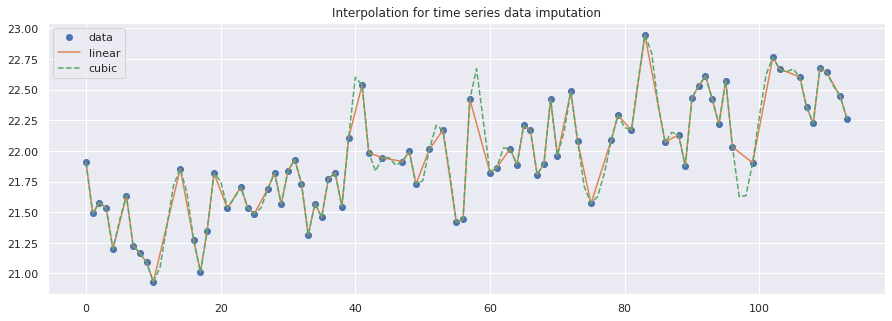

In [470]:
plt.plot(training.index, training.AverageTemperature, 'o', predict.index, f(predict.index), '-', predict.index, f2(predict.index), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.title('Interpolation for time series data imputation')
plt.savefig('sdfsdf.png')

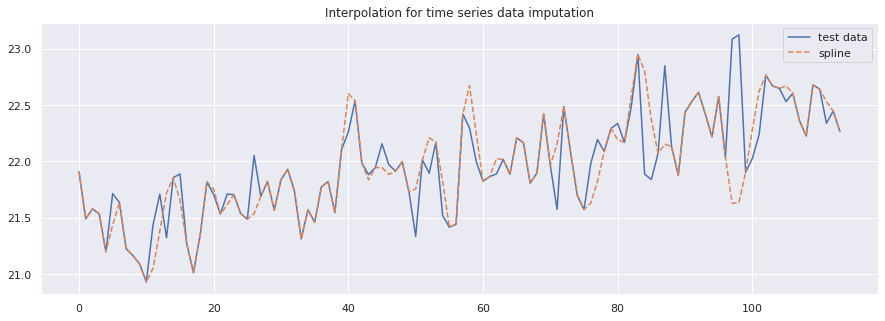

In [473]:
plt.plot(test.index, test.AverageTemperature, '-', predict.index, f2(predict.index), '--')
plt.legend(['test data', 'spline'], loc='best')
plt.title('Interpolation for time series data imputation')
plt.savefig('spline.png')

## Mean Errors

In [475]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test.AverageTemperature, f(predict.index)))  
print('Mean Squared Error:', metrics.mean_squared_error(test.AverageTemperature, f(predict.index)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.AverageTemperature, f(predict.index))))

Mean Absolute Error: 0.08921332846003908
Mean Squared Error: 0.051627136283876184
Root Mean Squared Error: 0.2272160563953969


In [476]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test.AverageTemperature, f2(predict.index)))  
print('Mean Squared Error:', metrics.mean_squared_error(test.AverageTemperature, f2(predict.index)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.AverageTemperature, f2(predict.index))))

Mean Absolute Error: 0.1086085965323847
Mean Squared Error: 0.07378356729183926
Root Mean Squared Error: 0.2716313076429874
